# TP OpenMP - October 2023
## Part 2 : Matrix Vector  
### Compilation

In [1]:
!g++ -o sequential_split sequential_split.cpp generate_stats.cpp -g -O3 
!g++ -o sequential_uint sequential_uint.cpp generate_stats.cpp -g -O3
!g++ -o sequential sequential.cpp generate_stats.cpp -g -O3
!g++ -o sequential_split_modulo sequential_split_modulo.cpp generate_stats.cpp -g -O3


### Performance evaluation

In [2]:
import os
import subprocess

try:
    os.remove("stats.csv")
except OSError:
    pass

# num_steps = [1000000, 100000000, 10000000000]#, 1000000000000]
num_steps = [100, 1000]#, 1000000000000]
n = [2, 4, 8, 10, 12];
# don't forget the case (14,13) (16,15)
m = [1, 3, 7, 9, 11]; 
nb_core = [1, 2, 4, 8]
repeat = 100; 

for nValue in n:

    # args = ("./sequential_uint", "-M", str(mValue) ,"-C", str(ncore), "-N", str(nValue))
    args = ("./sequential_uint", "-M", str(nValue - 1), "-N", str(nValue))
    popen = subprocess.Popen(args, stdout=subprocess.PIPE)
    popen.wait()

    #args = ("./sequential", "-M", str(mValue) , "-C", str(ncore), "-N", str(nValue))
    args = ("./sequential", "-M", str(nValue - 1) , "-N", str(nValue))
    popen = subprocess.Popen(args, stdout=subprocess.PIPE)
    popen.wait()
    
    args = ("./sequential_split", "-nsplits", str(nValue - 1), "-M", str(nValue - 1), "-N" , str(nValue)); 
    popen = subprocess.Popen(args, stdout=subprocess.PIPE)
    popen.wait()

    args = ("./sequential_split_modulo", "-nsplits", str(nValue - 1),  "-M", str(nValue - 1), "-N" , str(nValue)); 
    popen = subprocess.Popen(args, stdout=subprocess.PIPE)
    popen.wait()

### Performance analysis
#### Weak scaling

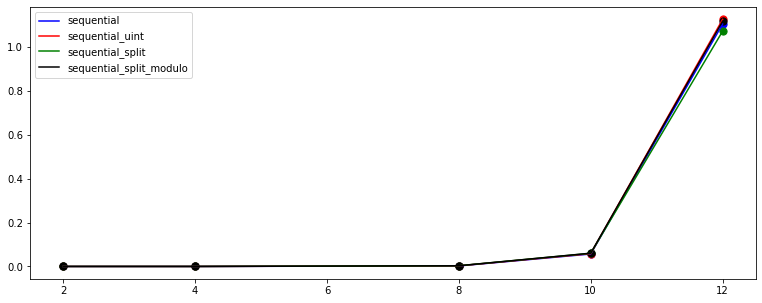

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('stats.csv',header=None,names=['version','nbcore','N', 'M','runtime', 'nsplits'],dtype={
                     'version': str,
                     'nbcore': int,
                     'N' : int,
                     'M' : int,
                     'runtime' : float, 
                     'nsplits': int,
                 })

color_num_steps = {100: "yellow", 1000: "brown",  1000000 : "blue", 100000000 : "red", 10000000000 : "green", 1000000000000 : "black"}
# n = [2, 4, 8, 10, 12, 14, 16]; 
# m = [1, 3, 7, 9, 11, 13, 15]; 
color_N = {2: "yellow", 4: "brown", 8: "blue", 10: "red", 12: "green", 14: "grey"}
color_version = {"sequential" : "blue", "sequential_uint" : "red", "sequential_split" : "green", "sequential_split_modulo" : "black"}
versions = ["sequential", "sequential_uint", "sequential_split", "sequential_split_modulo"];
 
for version in versions: 
    df_plot = df[(df['version'] == version) & (df['N'] >= 2) & (df['N'] < 14)]
    mean_stats = df_plot.groupby(['N', 'version', 'nbcore']).mean().reset_index(); 
    plt.plot(mean_stats['N'].values, mean_stats['runtime'].values,linestyle="solid",color=color_version[version], label = version)
    #plt.yscale('log')
    #plt.xscale('log')
    plt.scatter(df_plot['N'], df_plot['runtime'], s=52 ,color=color_version[version])
    plt.gcf().set_size_inches((13, 5)) 

    
plt.legend()
plt.show()

#### Strong Scaling

## Evaluation of the performance of n split matrixes

In [16]:
import os
import subprocess
try:
    os.remove("stats.csv")
except OSError:
    pass
n = [2, 4, 8, 10, 12, 14];
#splits = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
splits = [-3, -2, -1, 0, 1, 2]
for nValue in n:  
    for split in splits: 
        args = ("./sequential_split_modulo", "-nsplits", str(nValue + split), "-M", str(nValue-1), "-N" , str(nValue)); 
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()


## Evaluation Analysis


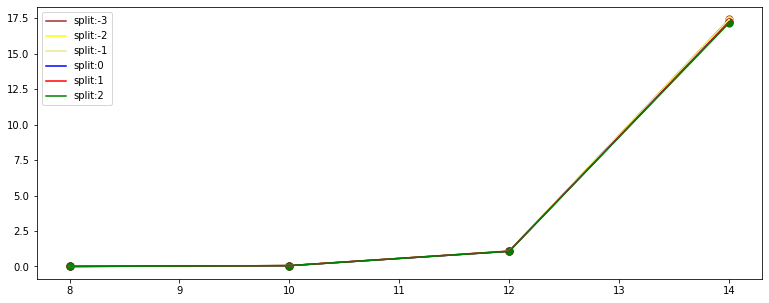

In [17]:
df = pd.read_csv('stats.csv',header=None,names=['version','nbcore','N', 'M','runtime', 'nsplits'],dtype={
                     'version': str,
                     'nbcore': int,
                     'N' : int,
                     'M' : int,
                     'runtime' : float, 
                     'nsplits': int,
                 })

color_num_steps = {100: "yellow", 1000: "brown",  1000000 : "blue", 100000000 : "red", 10000000000 : "green", 1000000000000 : "black"}
# n = [2, 4, 8, 10, 12, 14, 16]; 
# m = [1, 3, 7, 9, 11, 13, 15]; 
color_N = {2: "yellow", 4: "brown", 8: "blue", 10: "red", 12: "green", 14: "grey"}
color_version = {"sequential" : "blue", "sequential_uint" : "red", "sequential_split" : "green", "sequential_split_modulo" : "black"}
versions = ["sequential", "sequential_uint", "sequential_split", "sequential_split_modulo"];
splits_color = {-1: "Khaki", -2 : "yellow", -3: "brown", 0:"blue", 1: "red", 2 :"green", 3:"grey", 8:"Orchid", 9 :"purple", 10:"Plum"}
df = df[df['version'] == "sequential_split_modulo"]
df = df[(df['N'] >= 8) & (df['N'] < 16)]
for split in splits: 
    # watchout, not sure if it gives a it32_t size, if it is a need to change the type when it comes to last test of N.
    df_plot = df[df['nsplits'] == split ]
    mean_stats = df_plot.groupby(['nsplits', 'version', 'nbcore']).mean().reset_index(); 
    plt.plot(df_plot['N'].values, df_plot['runtime'].values,linestyle="solid",color=splits_color[split], label = "split:" + str(split))
    plt.scatter(df_plot['N'], df_plot['runtime'], s=52 ,color=splits_color[split])
    #plt.yscale('log')
    #plt.xscale('log')
plt.gcf().set_size_inches((13, 5)) 

    
plt.legend()
plt.show()

## Evaluation for Parallelism of the split version of the M_V mult.

In [6]:
# algo seq parallelization
!g++ -fopenmp -o p_reduction parallelism/p_reduction.cpp generate_stats.cpp -g -O3 

# algo split modulo seq parallelization
!g++ -fopenmp -o p_split_modulo_atom parallelism/p_split_modulo_atom.cpp generate_stats.cpp -g -O3 
!g++ -fopenmp -o p_split_modulo_critical parallelism/p_split_modulo_critical.cpp generate_stats.cpp -g -O3
!g++ -fopenmp -o p_split_modulo_reduction parallelism/p_split_modulo_reduction.cpp generate_stats.cpp -g -O3

parallelism/p_split_modulo_reduction.cpp:53:10: fatal error: ittnotify.h: No such file or directory
   53 | #include <ittnotify.h>
      |          ^~~~~~~~~~~~~
compilation terminated.


### Evaluation of Parallelism considering the number of splits on the Matrix.

In [7]:
import os
import subprocess
try:
    os.remove("stats.csv")
except OSError:
    pass
n = [2, 4, 8, 10, 12, 14];
#splits = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
splits = [0, 1, 2, 3, 4, 5, 6, 7, 8]
for nValue in n:  
    for split in splits: 
        args = ("./p_split_modulo_reduction", "-nsplits", str(nValue + split), "-M", str(nValue-1), "-N" , str(nValue)); 
        popen = subprocess.Popen(args, stdout=subprocess.PIPE)
        popen.wait()


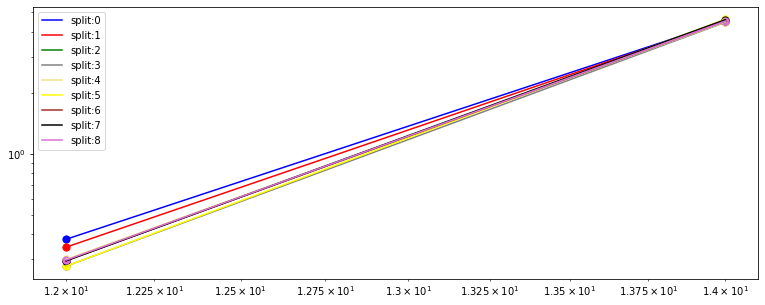

In [8]:
df = pd.read_csv('stats.csv',header=None,names=['version','nbcore','N', 'M','runtime', 'nsplits'],dtype={
                     'version': str,
                     'nbcore': int,
                     'N' : int,
                     'M' : int,
                     'runtime' : float, 
                     'nsplits': int,
                 })

color_num_steps = {100: "yellow", 1000: "brown",  1000000 : "blue", 100000000 : "red", 10000000000 : "green", 1000000000000 : "black"}
# n = [2, 4, 8, 10, 12, 14, 16]; 
# m = [1, 3, 7, 9, 11, 13, 15]; 
color_N = {2: "yellow", 4: "brown", 8: "blue", 10: "red", 12: "green", 14: "grey"}
color_version = {"p_split_modulo_atom" : "blue", "p_split_modulo_critical" : "red", "p_split_modulo_reduction" : "green", "p_reduction" : "black"}
versions = ["p_reduction", "p_split_modulo_atom", "p_split_modulo_critical", "p_split_modulo_reduction"];
splits_color = {4: "Khaki", 5: "yellow", 6: "brown", 0:"blue", 1: "red", 2 :"green", 3:"grey", 7: "black", 8:"Orchid", 9 :"purple", 10:"Plum"}
df = df[df['version'] == "p_split_modulo_reduction"]
df = df[(df['N'] >= 12) & (df['N'] < 16)]
for split in splits: 
    # watchout, not sure if it gives a it32_t size, if it is a need to change the type when it comes to last test of N.
    df_plot = df[df['nsplits'] == split ]
    mean_stats = df_plot.groupby(['nsplits', 'version', 'nbcore']).mean().reset_index(); 
    plt.plot(df_plot['N'].values, df_plot['runtime'].values,linestyle="solid",color=splits_color[split], label = "split:" + str(split))
    plt.scatter(df_plot['N'], df_plot['runtime'], s=52 ,color=splits_color[split])
    plt.yscale('log')
    plt.xscale('log')
plt.gcf().set_size_inches((13, 5)) 

    
plt.legend()
plt.show()

In [9]:
### Evaluation of Para.. on diffrent parallelization methods on the modulo algo. 

In [10]:
import os
import subprocess

try:
    os.remove("stats.csv")
except OSError:
    pass

# num_steps = [1000000, 100000000, 10000000000]#, 1000000000000]
num_steps = [100, 1000]#, 1000000000000]
n = [2, 4, 8, 10, 12];
# don't forget the case (14,13) (16,15)
m = [1, 3, 7, 9, 11]; 
nb_core = [1, 2, 4, 8]
repeat = 100; 

for nValue in n:
    # The parallization of the seq algo 
    args = ("./p_reduction", "-M", str(nValue - 1), "-N", str(nValue))
    popen = subprocess.Popen(args, stdout=subprocess.PIPE)
    popen.wait()

    
    
    # The parallization of the split modulo algo
    
    # args = ("./sequential_uint", "-M", str(mValue) ,"-C", str(ncore), "-N", str(nValue))
    args = ("./p_split_modulo_atom", "-M", str(nValue - 1), "-N", str(nValue), "-nsplits", str(nValue + 2), "-nrepeat" , str(1000))
    popen = subprocess.Popen(args, stdout=subprocess.PIPE)
    popen.wait()

    #args = ("./sequential", "-M", str(mValue) , "-C", str(ncore), "-N", str(nValue))
    args = ("./p_split_modulo_critical", "-M", str(nValue - 1), "-N", str(nValue), "-nsplits", str(nValue + 2), "-nrepeat" , str(1000))
    popen = subprocess.Popen(args, stdout=subprocess.PIPE)
    popen.wait()

    args = ("./p_split_modulo_reduction", "-M", str(nValue - 1), "-N", str(nValue), "-nsplits", str(nValue + 2), "-nrepeat" , str(1000))
    popen = subprocess.Popen(args, stdout=subprocess.PIPE)
    popen.wait()


### Parallelism of the split algo evaluation analysis

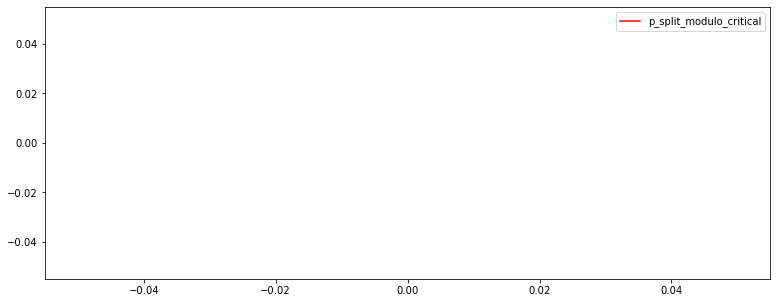

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import genfromtxt

import pandas as pd

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('stats.csv',header=None,names=['version','nbcore','N', 'M','runtime', 'nsplits'],dtype={
                     'version': str,
                     'nbcore': int,
                     'N' : int,
                     'M' : int,
                     'runtime' : float, 
                     'nsplits': int,
                 })

color_num_steps = {100: "yellow", 1000: "brown",  1000000 : "blue", 100000000 : "red", 10000000000 : "green", 1000000000000 : "black"}
# n = [2, 4, 8, 10, 12, 14, 16]; 
# m = [1, 3, 7, 9, 11, 13, 15]; 
color_N = {2: "yellow", 4: "brown", 8: "blue", 10: "red", 12: "green", 14: "grey"}
color_version = {"p_split_modulo_atom" : "blue", "p_split_modulo_critical" : "red", "p_split_modulo_reduction" : "green", "p_reduction" : "black"}
#versions = ["p_reduction", "p_split_modulo_atom", "p_split_modulo_critical", "p_split_modulo_reduction"];
versions = ["p_split_modulo_critical"]
for version in versions: 
    df_plot = df[(df['version'] == version) & (df['N'] >= 2) & (df['N'] < 14)]
    mean_stats = df_plot.groupby(['N', 'version', 'nbcore']).mean().reset_index(); 
    plt.plot(mean_stats['N'].values, mean_stats['runtime'].values,linestyle="solid",color=color_version[version], label = version)
    #plt.yscale('log')
    #plt.xscale('log')
    plt.scatter(df_plot['N'], df_plot['runtime'], s=52 ,color=color_version[version])
    plt.gcf().set_size_inches((13, 5)) 

    
plt.legend()
plt.show()

### Discussion